# Kernel Matrix Simulation

In [6]:
import numpy as np
import math
from matplotlib import pyplot as plt

Consider the kernel,
$$ k(x) = x + \frac{x^2-1}{\sqrt{2}}. $$
Notice that this kernel satisfies the assumptions of Theorem $1.7$ from Fan and Montanari. In particular here $a_2=1$ and hence by Theorem $1.7$ we expect to have two outlying eigenvalues because of the contribution from $\tilde{R}(X)$.

In [7]:
def kernel (x, a_0 = 0, a_1 = 1, a_2 = 1):
    return (a_0 + a_1 * x + a_2 * (x ** 2 - 1) / math.sqrt(2))

def kernel2(x, a_0 = 0, a_1 = 1, a_2 = 1, a_3 = 1):
    return (a_0 + a_1 * x + a_2 * (x ** 2 - 1) / math.sqrt(2) + a_3 * (x ** 3 - 3 * x) / math.sqrt(6))

def kernelmatrix (GramMatrix, n):
    (a, b) = GramMatrix.shape
    y = np.zeros((a, b))

    for i in range(a):
        for j in range(b):
            if i != j :
                y[i, j] = kernel(GramMatrix[i, j])/math.sqrt(n)
    return y

In the following we do a simulation for eigenvalues of the kernel matrix formed as follows. Generate random vectors $X_1,X_2,\ldots,X_n\sim \mathrm{N}\left(\bm{0}_d, I_{d\times d} + \lambda\bm{v}\bm{v}^{\top}\right)$ where $v\sim\mathrm{N}\left(\bm{0}_d, I_{d\times d}\right)$. We consider the proportional regime $d\approx n$.

[ 3.08168779  3.13756882  3.16265419  5.45690668 10.78308507]
-5.741850089664402


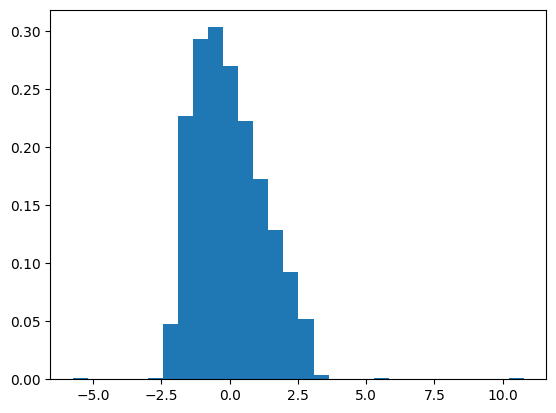

In [8]:
n = 2000
d = 1600
snr = 10 

v = np.random.normal(0,1,d)

Sigma = np.eye(d) + snr * np.outer(v, v) / np.dot(v, v)
data = np.random.normal(0, 1, (n, d))
GramMatrix = np.matmul(np.matmul(data, Sigma), data.transpose()) / np.sqrt(n)
KMatrix = kernelmatrix(GramMatrix, n = n)

KMatEigenVals = np.linalg.eigvalsh(KMatrix)
plt.hist(KMatEigenVals, 30, density = True)
print(KMatEigenVals[-5:])
print (KMatEigenVals[0])
plt.show() 

With $\lambda = 10$ we observe three outlying eigenvalues, where the two $\approx 5$ are contributed by the matrix $\tilde{R}$ where as the third $\approx 10$ is coming from the matrix $K^\prime$.

[3.03824939 3.06973825 3.07242483 3.10435152 6.08834619]
-6.2918564734533415


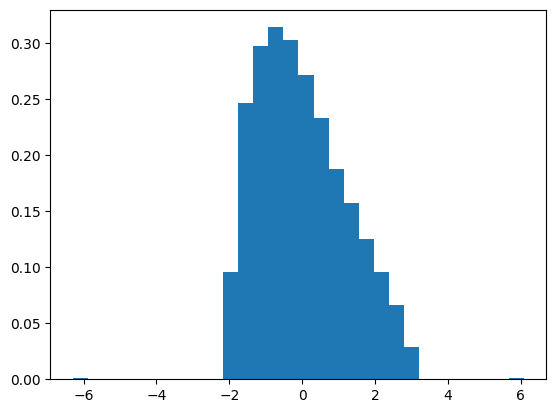

In [9]:
n = 2000
d = 1600
snr = 5

v = np.random.normal(0,1,d)

Sigma = np.eye(d) + snr * np.outer(v, v) / np.dot(v, v)
data = np.random.normal(0, 1, (n, d))
GramMatrix = np.matmul(np.matmul(data, Sigma), data.transpose()) / np.sqrt(n)
KMatrix = kernelmatrix(GramMatrix, n = n)

KMatEigenVals = np.linalg.eigvalsh(KMatrix)
plt.hist(KMatEigenVals, 30, density = True)
print(KMatEigenVals[-5:])
print (KMatEigenVals[0])
plt.show() 

With $\lambda = 5$ we observe two outlying eigenvalues at $\approx -6,6$

[3.02192492 3.03392352 3.06603985 3.07708866 3.14741057]
-6.599768166837652


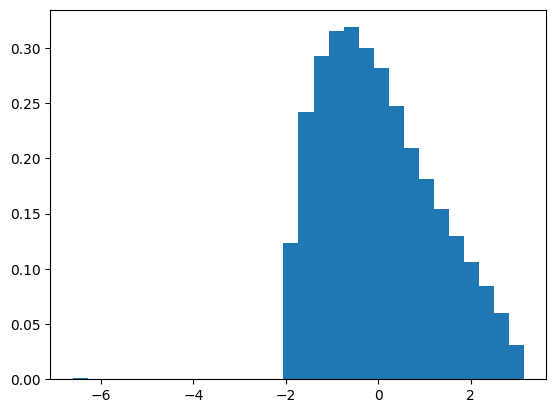

In [10]:
n = 2000
d = 1600
snr = 1

v = np.random.normal(0,1,d)

Sigma = np.eye(d) + snr * np.outer(v, v) / np.dot(v, v)
data = np.random.normal(0, 1, (n, d))
GramMatrix = np.matmul(np.matmul(data, Sigma), data.transpose()) / np.sqrt(n)
KMatrix = kernelmatrix(GramMatrix, n = n)

KMatEigenVals = np.linalg.eigvalsh(KMatrix)
plt.hist(KMatEigenVals, 30, density = True)
print(KMatEigenVals[-5:])
print (KMatEigenVals[0])
plt.show() 

With $\lambda = 1$ we observe one outlying eigenvalue at $\approx -6$.